In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from matplotlib.colors import ListedColormap

In [19]:
from matplotlib.colors import ListedColormap

def knn_comparison(data, n_neighbors = 15):
    '''
    This function finds k-NN and plots the data.
    '''
    X = data[:, :2]
    y = data[:,2] 
    
    
    # grid cell size
    h = .02
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])


    # the core classifier: k-NN
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # we create a mesh grid (x_min,y_min) to (x_max y_max) with 0.02 grid spaces
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # we predict the value (either 0 or 1) of each element in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # xx.ravel() will give a flatten array

    # np.c_ : Translates slice objects to concatenation along the second axis.
    # > np.c_[np.array([1,2,3]), np.array([4,5,6])]
    # > array([[1, 4],
    #          [2, 5],
    #          [3, 6]])   (source: np.c_ documentation)
    
    
    
    
    # convert the out back to the xx shape (we need it to plot the decission boundry)
    Z = Z.reshape(xx.shape)
    
    
    # pcolormesh will plot the (xx,yy) grid with colors according to the values of Z
    # it looks like decision boundry
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
   
    # scatter plot of with given points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    
    #defining scale on both axises
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
   
    # set the title
    plt.title('K value = '+str(n_neighbors))
    

    plt.show()

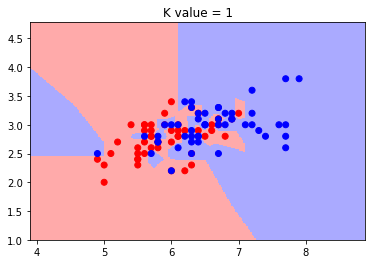

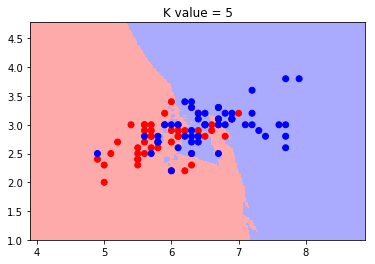

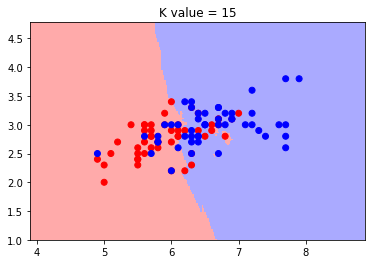

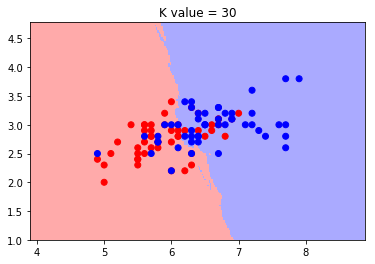

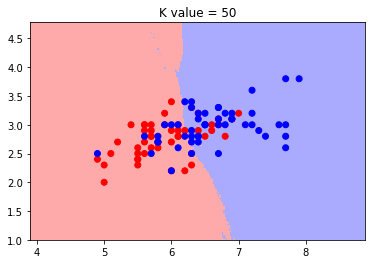

In [20]:
data = np.genfromtxt('demo_data/6.overlap.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data,15)
knn_comparison(data, 30)
knn_comparison(data, 50)

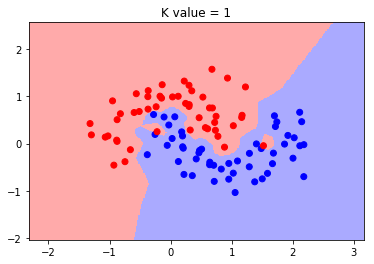

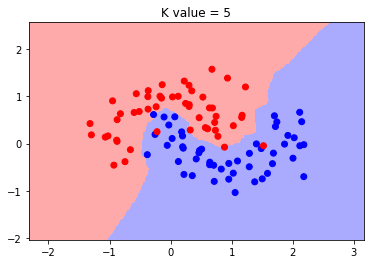

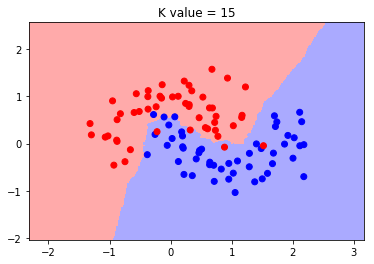

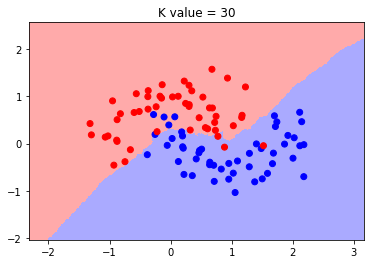

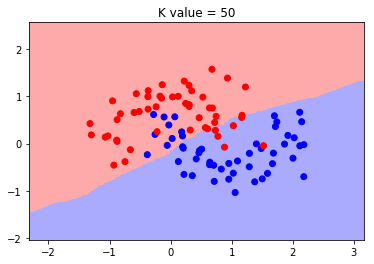

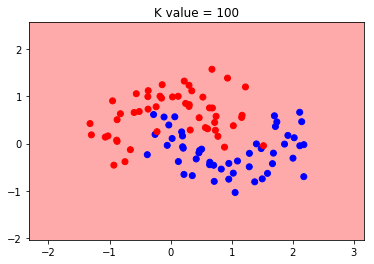

In [24]:
data = np.genfromtxt('demo_data/1.ushape.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data,15)
knn_comparison(data, 30)
knn_comparison(data, 50)
knn_comparison(data, 100)

In [38]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
import pandas as pd

In [45]:
# Part I
# ============================== data preprocessing ===========================================

# define column names
names = ['x', 'y', 'class']

# loading training data
df = pd.read_csv('./demo_data/3.concertriccir2.csv', header=None, names=names)
print(df.head())

# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:2]) # end index is exclusive
y = np.array(df['class']) # showing you two ways of indexing a pandas df


          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


In [46]:
# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr, y_tr)
    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))

knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 83%

CV accuracy for k = 3 is 83%

CV accuracy for k = 5 is 83%

CV accuracy for k = 7 is 81%

CV accuracy for k = 9 is 81%

CV accuracy for k = 11 is 80%

CV accuracy for k = 13 is 80%

CV accuracy for k = 15 is 80%

CV accuracy for k = 17 is 80%

CV accuracy for k = 19 is 80%

CV accuracy for k = 21 is 76%

CV accuracy for k = 23 is 76%

CV accuracy for k = 25 is 76%

CV accuracy for k = 27 is 72%

CV accuracy for k = 29 is 71%

****Test accuracy for k = 1 is 87%



The optimal number of neighbors is 3.


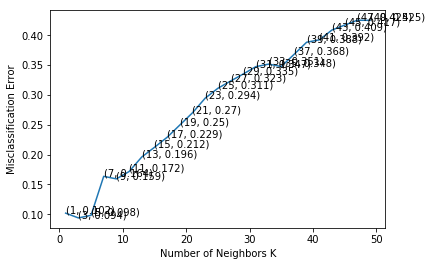

the misclassification error for each k value is :  [0.102 0.094 0.098 0.164 0.159 0.172 0.196 0.212 0.229 0.25  0.27  0.294
 0.311 0.323 0.335 0.347 0.351 0.348 0.368 0.388 0.392 0.409 0.417 0.425
 0.425]


In [47]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_tr, y_tr, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [49]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_tr, y_tr)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 3 is 86.666667%
